In [46]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('student_admission_record_dirty.csv')
df.sample(10)

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
67,Khurram,17.0,Male,NaN,0.00,Rawalpindi,NaN
7,Rabia,20.0,Female,82.0,55.67,Lahore,Accepted
108,Hania,24.0,Female,83.0,97.93,Quetta,Rejected
79,Muneera,19.0,Female,81.0,67.75,Karachi,Rejected
90,Maryam,17.0,Male,78.0,77.40,Quetta,Accepted
0,Shehroz,24.0,Female,50.0,68.90,Quetta,Rejected
92,NaN,20.0,Female,86.0,89.06,Karachi,Accepted
2,Bushra,17.0,Male,89.0,NaN,Islamabad,Accepted
100,Farhan,22.0,Female,65.0,76.72,Multan,Rejected
64,Shoaib,23.0,Male,97.0,54.71,Karachi,Rejected


In [34]:
df.isna().sum()

Name                      10
Age                       10
Gender                    10
Admission Test Score      11
High School Percentage    11
City                      10
Admission Status          10
dtype: int64

In [50]:
df.dropna(subset=['Gender', 'City'], inplace=True)
df.drop(columns='Name', inplace=True)
df['Age'].fillna(df.Age.mean(), inplace=True)
df['High School Percentage'].fillna(df['High School Percentage'].mean(), inplace=True)
df['Admission Test Score'].fillna(df['Admission Test Score'].mean(), inplace=True)

In [45]:
df.isna().any()

Name                      False
Age                       False
Gender                    False
Admission Test Score      False
High School Percentage    False
City                      False
Admission Status          False
dtype: bool

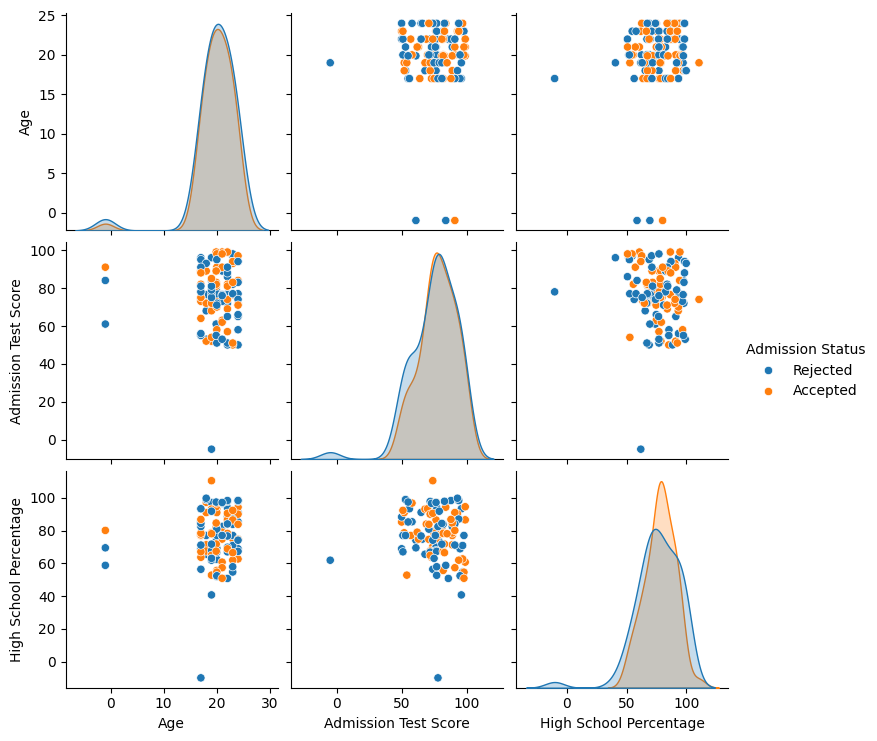

In [52]:
sns.pairplot(data=df, hue='Admission Status')

In [53]:
from sklearn.preprocessing import StandardScaler

In [66]:
numerical_data = ['Age', 'Admission Test Score', 'High School Percentage']
categorical_data = ['Gender', 'City']
categorical_data_encoded = pd.get_dummies(df[categorical_data], drop_first=True)
encoded_data = categorical_data_encoded
numerical_data_encoded = scaler.fit_transform(df[numerical_data])
encoded_data[numerical_data] = numerical_data_encoded
encoded_data

,Gender_Male,City_Karachi,City_Lahore,City_Multan,City_Peshawar,City_Quetta,City_Rawalpindi,Age,Admission Test Score,High School Percentage
0,False,False,False,False,False,True,False,1.037379,-1.688003,-0.516443
2,True,False,False,False,False,False,False,-0.724863,0.795027,0.000000
3,True,True,False,False,False,False,False,-0.724863,-1.369666,0.523089
5,False,False,False,False,False,False,False,0.785630,0.000000,0.000000
6,True,False,False,True,False,False,False,-0.473114,0.000000,1.285455
...,...,...,...,...,...,...,...,...,...,...
152,False,False,False,False,False,True,False,-0.221365,0.540357,0.066431
153,False,False,False,False,False,False,False,-0.724863,0.285687,0.466641
154,False,False,False,True,False,False,False,0.282132,1.368034,-1.660627
155,True,False,False,False,False,True,False,-5.256341,0.922361,0.195183


In [69]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder().fit_transform(df['City'])

array([5, 0, 1, 0, 3, 2, 1, 3, 5, 2, 1, 0, 4, 0, 1, 2, 4, 5, 3, 2, 4, 5,
       0, 6, 6, 5, 3, 4, 3, 3, 3, 6, 5, 0, 1, 3, 5, 3, 2, 5, 1, 5, 1, 2,
       3, 3, 2, 4, 5, 3, 4, 6, 1, 1, 4, 6, 0, 4, 4, 1, 1, 1, 5, 3, 2, 4,
       0, 4, 5, 6, 1, 5, 2, 3, 1, 3, 1, 3, 3, 1, 0, 6, 1, 6, 5, 5, 3, 2,
       4, 5, 1, 5, 5, 6, 4, 3, 1, 4, 0, 0, 1, 4, 0, 4, 5, 4, 2, 3, 5, 2,
       1, 5, 6, 1, 5, 5, 6, 2, 2, 6, 5, 0, 3, 5, 2])